In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [241]:
import os

In [242]:
os.getcwd()

'/Users/shoumik20/Shoumik_work/Repos/EE559/Hw1'

In [243]:
df_synthetic1_train = pd.read_csv('python3/synthetic1_train.csv', header = None)
df_synthetic2_train = pd.read_csv('python3/synthetic2_train.csv',header = None)
df_wine_train = pd.read_csv('python3/wine_train.csv', header = None)
df_synthetic1_test = pd.read_csv('python3/synthetic1_test.csv', header = None)
df_synthetic2_test = pd.read_csv('python3/synthetic2_test.csv', header = None)
df_wine_test = pd.read_csv('python3/wine_test.csv', header = None)

In [262]:
s1_train_f = df_synthetic1_train.iloc[:,[0,1]].to_numpy()
s1_train_l = df_synthetic1_train.iloc[:,[-1]].to_numpy().reshape(-1)

In [263]:
ind_1 = np.where(s1_train_l == 1)
ind_2 = np.where(s1_train_l == 2)
print(ind_2[0])

[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


In [280]:
s1_mean_l1 = s1_train_f[ind_1[0]].mean(axis=0)
s1_mean_l2 = s1_train_f[ind_2[0]].mean(axis=0)
s1_mean = np.stack((s1_mean_l1,s1_mean_l2))
print(s1_mean_l1)
print(s1_mean_l2)
print(s1_mean)

AxisError: axis 1 is out of bounds for array of dimension 1

In [265]:
## PlotDecBoundaries

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecBoundaries(training, label_train, sample_mean):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()


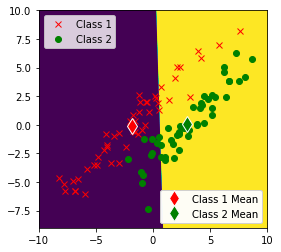

In [266]:
plotDecBoundaries(s1_train_f, s1_train_l, s1_mean)

In [267]:
pred_train_s1_l = np.array([])
for i in range(len(s1_train_f)):
    d1 = np.linalg.norm(s1_train_f[i] - s1_mean_l1)
    d2 = np.linalg.norm(s1_train_f[i] - s1_mean_l2)
    if d1 < d2:
        pred_train_s1_l = np.append(pred_train_s1_l, 1)
    else:
        pred_train_s1_l= np.append(pred_train_s1_l, 2)

Error_rate_train_s1 = (np.sum(pred_train_s1_l != s1_train_l)/ pred_train_s1_l.shape[0])
print('Error rate for Synthetic1 train = ', Error_rate_train_s1)      

Error rate for Synthetic1 train =  0.21


In [268]:
Error_rate_train_s1 = (np.sum(pred_train_s1_l != s1_train_l)/ pred_train_s1_l.shape[0])
print('Error rate for Synthetic1 train = ', Error_rate_train_s1)

Error rate for Synthetic1 train =  0.21


In [269]:
s1_test_f = df_synthetic1_test.loc[:,[0,1]].to_numpy()
s1_test_l = df_synthetic1_test.loc[:,[2]].to_numpy().reshape(-1)

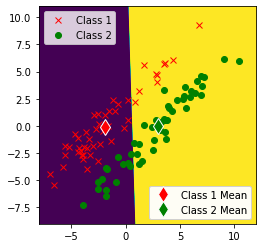

In [270]:
plotDecBoundaries(s1_test_f, s1_test_l, s1_mean)

In [271]:
pred_test_s1_l = np.array([])
for i in range(len(s1_test_f)):
    d1 = np.linalg.norm(s1_test_f[i] - s1_mean_l1)
    d2 = np.linalg.norm(s1_test_f[i] - s1_mean_l2)
    if d1 < d2:
        pred_test_s1_l = np.append(pred_test_s1_l, 1)
    else:
        pred_test_s1_l= np.append(pred_test_s1_l, 2)

print(pred_test_s1_l)

[1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1.
 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1.
 1. 1. 2. 2.]


In [272]:
Error_rate_test_s1 = (np.sum(pred_test_s1_l != s1_test_l)/ pred_test_s1_l.shape[0])
print('Error rate for Synthetic1 test = ', Error_rate_test_s1)

Error rate for Synthetic1 test =  0.24


In [273]:
np.unique(s1_test_l)

array([1, 2])

In [275]:
a = np.array([1,2,6,8])
for i in a:
    print(i)

1
2
6
8


In [278]:
s1_mean

array([[-1.8731152 , -0.1166418 ],
       [ 2.98095798,  0.03548129]])